In [ ]:
!pip3 install scipy==1.1.0
!pip3 install sklearn==1.1.0


ERROR: Could not find a version that satisfies the requirement sklearn==1.1.0 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==1.1.0


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import scipy.misc
# import imread
import imageio
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize
import sys
import os
import scipy
scipy.__version__


'1.1.0'

In [ ]:
# import zipfile
# zip_ref=zipfile.ZipFile("SignImg.zip", "r")
# zip_ref.extractall()
# zip_ref.close()
!unzip ./SignImg.zip

Archive:  ./SignImg.zip
replace SignImg/sign_data/test/049/01_049.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
np.set_printoptions(threshold=sys.maxsize)
# /content/SignImg/sign_data/train/001/001_01.PNG
sig_dir='/content/SignImg/sign_data/train'
trainingSet=[]
# train_dir_no=[1,2,3,4,6,9,12,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]
train_dir_no=[1,2,3,4,6,9,12,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
print(len(train_dir_no))
trainingTarget=[]
testingSet=[]
testingTarget=[]
for i in train_dir_no:
    if(i<10):
        val="00"+str(i)
    else:
        val="0"+str(i)
    for j in range(1,12):
        if(j<10):
            ue="0"+str(j)
        else:
            ue=str(j)
#         counter=((i-1)*55)+j
        image=sig_dir+"/"+val+"/"+val+"_"+ue+".PNG"
        # print(image)
#         './HandwritingImg/img'+str(counter)+'.png'
        # img_data=imread.imread(image,1)
        img_data=imread(image,1)
        # img_data=imageio.imread(image,1)
        img_data=imresize(img_data,(20,20))
        data=np.ravel(img_data)
        data=scipy.ndimage.gaussian_filter(data, sigma=1)
        if((j%3)==0):
            testingSet.append(data)
            testingTarget.append(i)
        else:
            trainingSet.append(data)
            trainingTarget.append(i)
          
#         if((j%5)==0):
#             testingSet.append(data)
    print(i)
print(len(trainingSet[5]))

30
1
2
3
4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


6
9
12
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
400


In [ ]:
print(len(trainingSet))
print(len(trainingTarget))
print(len(testingSet))
train_arr=np.asarray(trainingSet)
print(type(train_arr))
# print(np.array(train_arr))
# print(np.array(trainingTarget).shape())
z=train_arr.shape
print(z)


240
240
90
<class 'numpy.ndarray'>
(240, 400)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from keras.models import Sequential
# from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense
# import keras
# model 1 - mlp(NN)
# nn=MLPClassifier(solver='lbfgs', max_iter=500, alpha=1e-4, learning_rate='adaptive',
#                      hidden_layer_sizes=(100,100,100), random_state=21, tol=0.000000001)
nn = MLPClassifier(hidden_layer_sizes=(30,15, 30), max_iter=10, alpha=1e-7,
                    solver='sgd', verbose=10, activation='logistic',
                    learning_rate_init=.5)

nn.fit(trainingSet, trainingTarget)

# # CREating a test NN
# def nonlin(x,deriv=False):
#     if(deriv):
#         return x*(1-x)
#     return 1/(1+np.exp(-x))
# syn0=2*np.random.random((784,784))-1
# print(len(trainingSet))
# print(len(syn0))
# # testingSet=trainingSet
# # # print(len(nonlin(np.dot(trainingSet, syn0))))
# # # model 1 - neural network
# for x in range(10):
#     l0=trainingSet
#     l1=nonlin(np.dot(l0, syn0))
#     l1_err= testingSet[0:660]-l1[0:660]
#     l1_delta=l1_err*nonlin(l1[0:660],True)
#     syn0+=np.dot(np.asarray(l0[0:660]).T, l1_delta)

# # print("OUTPUT:")
# print(np.asarray(l1[0:1], dtype=np.str))
print("\n\n\n")
# model 2 knn
knn_clf=KNeighborsClassifier(n_jobs=1, weights='distance', n_neighbors=2)
knn_clf.fit(trainingSet, trainingTarget)

print(knn_clf.predict([trainingSet[0]]))
from sklearn.model_selection import cross_val_score


#model 3- svm
svm_clf=svm.SVC()
svm_clf.fit(trainingSet, trainingTarget)




# model 4 - rfc
rfc=RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)
rfc.fit(trainingSet, trainingTarget)
rfc_score= cross_val_score(rfc, trainingSet, trainingTarget, cv=3, scoring="accuracy")
# acc=rfc.predict([trainingSet[0]])
# print(acc)
# print(f"RFC ACCuracy: %f", rfc_score)
# testing_files = ['./ocr/testing/adobe.png', './ocr/testing/shazam.png']
# testingSet=[]
all_files_mlp=[]
all_files_knn=[]
all_files_rfc=[]
all_files_svm=[]
# for files in testing_files:
#     test=extract.extractFile(files)
#     file_data=[]
#     count=0
for i in testingSet:
    value_nn=nn.predict([np.asarray(i.flatten())])
    value_knn=knn_clf.predict([np.asarray(i.flatten())])
    value_svm=svm_clf.predict([np.asarray(i.flatten())])
    value_rfc=rfc.predict([np.asarray(i.flatten())])
    all_files_mlp.append(value_nn)
    all_files_knn.append(value_knn)
    all_files_svm.append(value_svm)
    all_files_rfc.append(value_rfc)
    all_files_knn.append("---------")
    all_files_rfc.append("---------")

print("NN")   
print(np.asarray(all_files_mlp, dtype='object'))
print("\n\n\n")
temp = cross_val_score(nn, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("NN Acc:", temp)



print("KNN")   
print(np.asarray(all_files_knn, dtype='object'))
# print(all_files_knn)
print("\n\n\n")
temp = cross_val_score(knn_clf, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("KNN Acc:", temp)
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt



Iteration 1, loss = 3.45941522
Iteration 2, loss = 3.42136938
Iteration 3, loss = 3.44652813
Iteration 4, loss = 3.44106337
Iteration 5, loss = 3.45216905
Iteration 6, loss = 3.44723533
Iteration 7, loss = 3.43858057
Iteration 8, loss = 3.42696333
Iteration 9, loss = 3.43258866
Iteration 10, loss = 3.44172278




[1]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NN
[[23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]
 [23]]




Iteration 1, loss = 3.44408661
Iteration 2, loss = 3.42054347
Iteration 3, loss = 3.40450434
Iteration 4, loss = 3.39804342
Iteration 5, loss = 3.39864549
Iteration 6, loss = 3.40202829
Iteration 7, loss = 3.40462227
Iteration 8, loss = 3.40489107
Iteration 9, loss = 3.40317559
Iteration 10, loss = 3.40071505
Iteration 1, loss = 3.43220403
Iteration 2, loss = 3.41573957
Iteration 3, loss = 3.40361887
Iteration 4, loss = 3.39820542
Iteration 5, loss

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 5968919.67458124
Iteration 5, loss = 12104063.03309826
Iteration 6, loss = 19463565.16026079
Iteration 7, loss = 27575791.93340791
Iteration 8, loss = 36082620.00409222
Iteration 9, loss = 44715479.78100219
Iteration 10, loss = 53276189.23177461
Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 6122850.79412687
Iteration 5, loss = 12417726.11605222
Iteration 6, loss = 19969055.36586939
Iteration 7, loss = 28292861.85604853
Iteration 8, loss = 37021649.20108829
Iteration 9, loss = 45879817.64765063
Iteration 10, loss = 54663996.53156845
Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 42592.51728738
Iteration 4, loss = 86646.11268616
Iteration 5, loss = 139530.57787185
Iteration 6, loss = 197847.92532330
Iteration 7, loss = 259017.79518410
Iteration 8, loss = 321104.90542736
Iteration 9, loss = 382681.00646564
Iteration 10, loss = 44271

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

Iteration 9, loss = 38347910.90544879
Iteration 10, loss = 45690290.64512309
Iteration 1, loss = 222.45234687
Iteration 2, loss = inf
Iteration 3, loss = 189782.63700327
Iteration 4, loss = 386125.47925594
Iteration 5, loss = 621833.59131415
Iteration 6, loss = 881759.89509866
Iteration 7, loss = 1154401.94331843
Iteration 8, loss = 1431132.78682978
Iteration 9, loss = 1705585.63937946
Iteration 10, loss = 1973162.35263385
Iteration 1, loss = 259.19927181
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 23603328.09497282
Iteration 5, loss = 47918055.11878818
Iteration 6, loss = 77092724.27019006
Iteration 7, loss = 109255948.41904549
Iteration 8, loss = 142986700.68234235
Iteration 9, loss = 177219266.91324133
Iteration 10, loss = 211167205.00737321
Iteration 1, loss = 318.88537287
Iteration 2, loss = inf
Iteration 3, loss = 26986.99948457
Iteration 4, loss = 54900.29574854
Iteration 5, loss = 88409.28571862
Iteration 6, loss = 125360.84913013
Iteration 7, loss = 164

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

Iteration 10, loss = 81319104.50498116
Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 21685.32752612
Iteration 4, loss = 44113.07211639
Iteration 5, loss = 71036.63222314
Iteration 6, loss = 100726.08481195
Iteration 7, loss = 131867.76283236
Iteration 8, loss = 163476.40975322
Iteration 9, loss = 194824.90037436
Iteration 10, loss = 225388.10276695
Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 4008109.65362525
Iteration 5, loss = 8122312.33970017
Iteration 6, loss = 13056786.45372011
Iteration 7, loss = 18495482.11410553
Iteration 8, loss = 24198418.57760902
Iteration 9, loss = 29985629.16996198
Iteration 10, loss = 35724316.86666553
Iteration 1, loss = 213.70983427
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 1892613.49421023
Iteration 5, loss = 3679318.94023301
Iteration 6, loss = 5800163.59570310
Iteration 7, loss = 8124293.95104897
Iteration 8, loss = 10552454.65482999
Iteration 9, loss = 130

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

Iteration 1, loss = 210.70418017
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 1892854.83317094
Iteration 5, loss = 3679607.71779299
Iteration 6, loss = 5800480.84450092
Iteration 7, loss = 8124625.30282678
Iteration 8, loss = 10552789.36709361
Iteration 9, loss = 13010641.58077245
Iteration 10, loss = 15443429.77314340
Iteration 1, loss = 251.22641500
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 41153547.34516348
Iteration 5, loss = 83613356.71625194
Iteration 6, loss = 134569207.76813388
Iteration 7, loss = 190750469.94568539
Iteration 8, loss = 249673565.31011450
Iteration 9, loss = 309475866.31846422
Iteration 10, loss = 368782809.04422593
Iteration 1, loss = 316.12976493
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 839130.45827606
Iteration 5, loss = 1684066.59243827
Iteration 6, loss = 2695142.64484141
Iteration 7, loss = 3808123.75897356
Iteration 8, loss = 4974246.46495485
Iteration 9, loss = 6156952.45196973
I

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


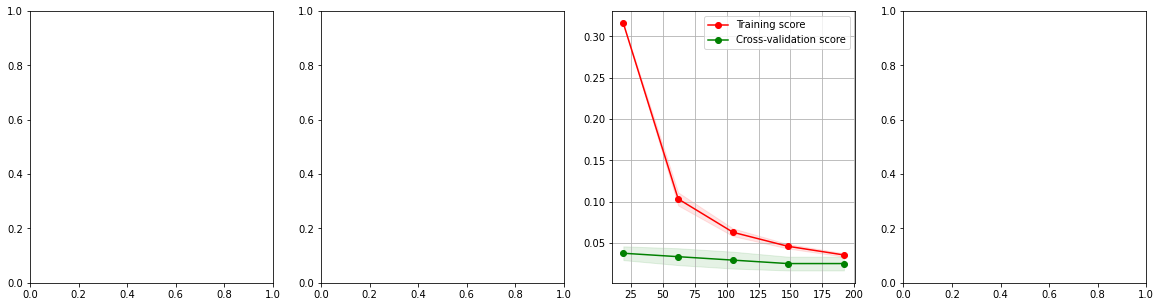

In [ ]:
temp = cross_val_score(nn, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("MLP Acc:", temp)

print("LEARNING CURVE MLP")
learn_svm_train_Size, learn_svm_Trainscore, learn_svm_TestScore, learn_svm_Fit, _= learning_curve(nn,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_svm_Trainscore, axis=1)
train_score_std=np.std(learn_svm_Trainscore, axis=1)
test_score_mean=np.mean(learn_svm_TestScore, axis=1)
train_score_std=np.std(learn_svm_Trainscore, axis=1)
test_score_std=np.std(learn_svm_TestScore, axis=1)

_, axes=plt.subplots(1,4, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[2].grid()
axes[2].fill_between(learn_svm_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[2].fill_between(learn_svm_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[2].plot(learn_svm_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[2].plot(learn_svm_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[2].legend(loc="best")
plt.show()

In [ ]:
temp = cross_val_score(svm_clf, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("SVM Acc:", temp)
temp = cross_val_score(rfc, trainingSet, trainingTarget, cv=3, scoring="accuracy")
print("RFC Acc:", temp)

SVM Acc: [0.7125 0.7625 0.7375]
RFC Acc: [0.8125 0.875  0.8375]


LEARNING CURVE KNN


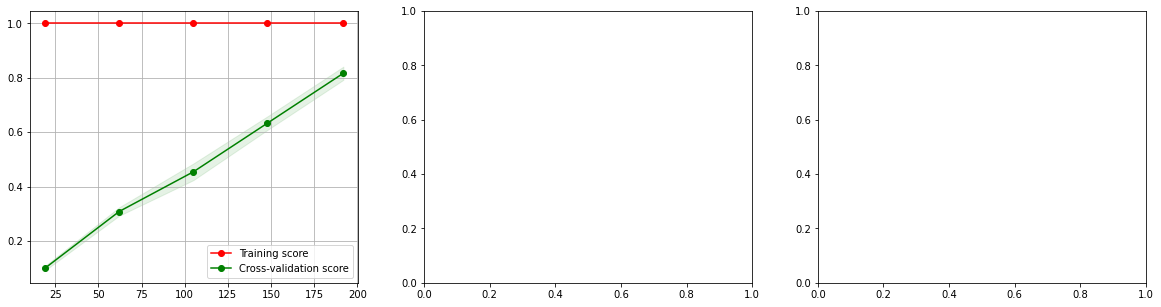

In [ ]:
print("LEARNING CURVE KNN")
learn_knn_train_Size, learn_knn_TrainScore, learn_knn_TestScore, learn_knn_Fit, _= learning_curve(knn_clf,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_knn_TrainScore, axis=1)
train_score_std=np.std(learn_knn_TrainScore, axis=1)
test_score_mean=np.mean(learn_knn_TestScore, axis=1)
test_score_std=np.std(learn_knn_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_knn_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_knn_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_knn_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_knn_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
plt.show()

LEARNING CURVE RFC


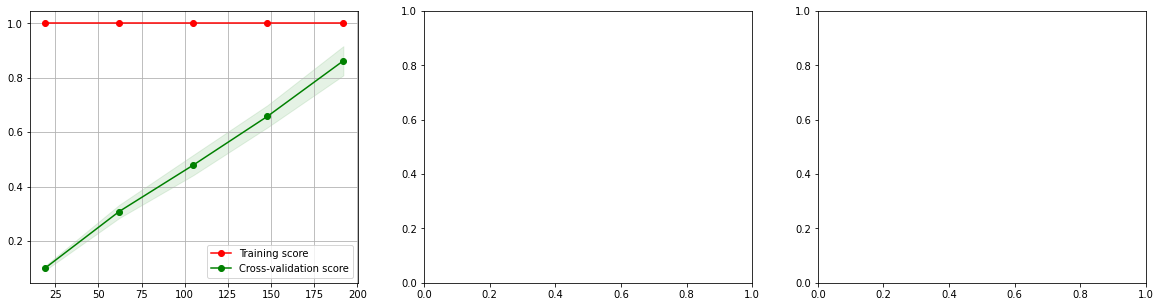

In [ ]:
print("LEARNING CURVE RFC")
learn_knn_train_Size, learn_knn_TrainScore, learn_knn_TestScore, learn_knn_Fit, _= learning_curve(rfc,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_knn_TrainScore, axis=1)
train_score_std=np.std(learn_knn_TrainScore, axis=1)
test_score_mean=np.mean(learn_knn_TestScore, axis=1)
test_score_std=np.std(learn_knn_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_knn_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_knn_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_knn_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_knn_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
plt.show()

LEARNING CURVE SVM


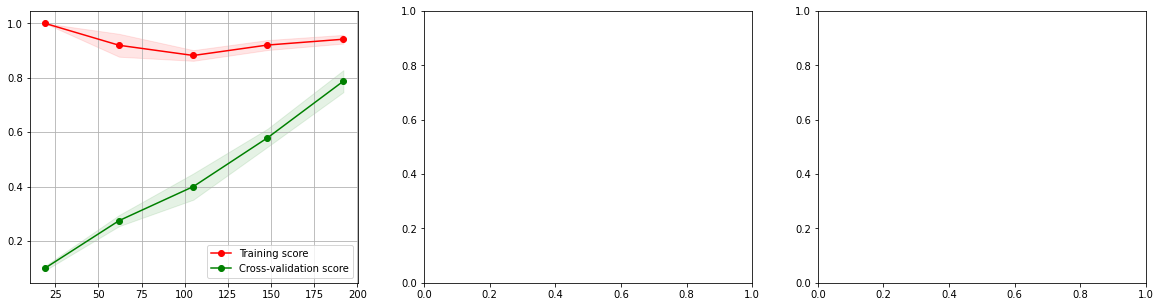

In [ ]:
print("LEARNING CURVE SVM")
learn_knn_train_Size, learn_knn_TrainScore, learn_knn_TestScore, learn_knn_Fit, _= learning_curve(svm_clf,trainingSet, trainingTarget, return_times=True)
train_score_mean=np.mean(learn_knn_TrainScore, axis=1)
train_score_std=np.std(learn_knn_TrainScore, axis=1)
test_score_mean=np.mean(learn_knn_TestScore, axis=1)
test_score_std=np.std(learn_knn_TestScore, axis=1)

_, axes=plt.subplots(1,3, figsize=(20,5))
# axes[0].set_title("KNN")
# axes[0].set_xlabel("KNN")
# axes[0].set_ylabel("KNN Score")
# axes[0].grid()
# axes
# Plot learning curve
axes[0].grid()
axes[0].fill_between(learn_knn_train_Size, train_score_mean - train_score_std,
                     train_score_mean + train_score_std, alpha=0.1,
                     color="r")
axes[0].fill_between(learn_knn_train_Size, test_score_mean - test_score_std,
                     test_score_mean + test_score_std, alpha=0.1,
                     color="g")
axes[0].plot(learn_knn_train_Size, train_score_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(learn_knn_train_Size, test_score_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")
# plt.show()

KNN


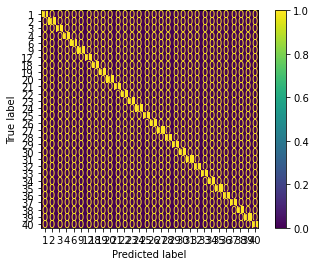

In [ ]:
from sklearn.metrics import plot_confusion_matrix

knn_cfm= plot_confusion_matrix(knn_clf, trainingSet, trainingTarget, normalize='true')
print("KNN")
print(knn_cfm)

MLP CONF MATRIX


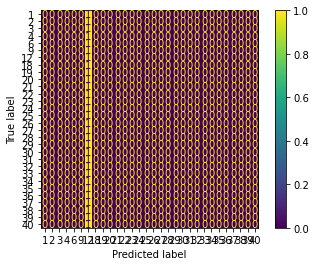

In [ ]:
mlp_cfm= plot_confusion_matrix(nn, trainingSet, trainingTarget, normalize='true')
print("MLP CONF MATRIX")
mlp_cfm

SVM CONF MATRIX


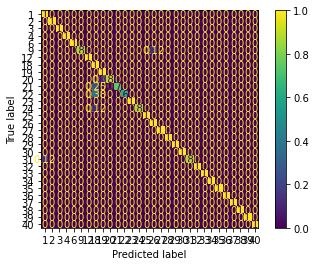

In [ ]:
svm_cfm= plot_confusion_matrix(svm_clf, trainingSet, trainingTarget, normalize='true')
print("SVM CONF MATRIX")
svm_cfm
# print(svm_cfm)

RFC CONF MATRIX


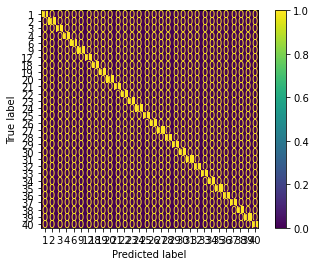

In [ ]:
rfc_cfm= plot_confusion_matrix(rfc, trainingSet, trainingTarget, normalize='true')
print("RFC CONF MATRIX")
rfc_cfm
